In [1]:
#visualizing 2-D data
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./data/P87-S3-Visual-Exploration-Resources/meteorite-landings.csv")

In [3]:
df.sample(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
9844,Elephant Moraine 87695,8245,Valid,H5,118.50,Found,1987.0,-76.18333,157.16667,"(-76.183330, 157.166670)"
14332,Grove Mountains 022291,46605,Valid,L5,12.24,Found,2003.0,-72.77944,75.29528,"(-72.779440, 75.295280)"
29552,Northwest Africa 5822,50700,Valid,H4,494.00,Found,2007.0,0.00000,0.00000,"(0.000000, 0.000000)"


In [4]:
#dropping NA values
df = df.dropna(subset=["reclong", "reclat"])
df = df[df.reclong < 300]

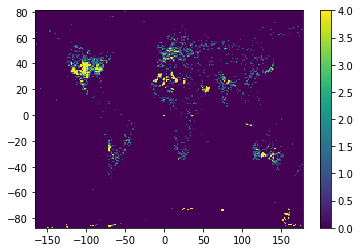

In [5]:
#2D-histogram
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=4)
plt.colorbar()

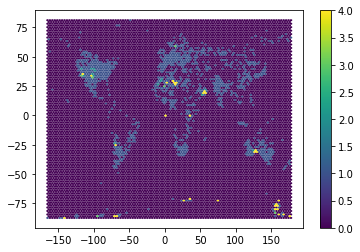

In [6]:
#2D hex-plots
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0.0)
plt.colorbar()

<AxesSubplot:xlabel='reclong', ylabel='reclat'>

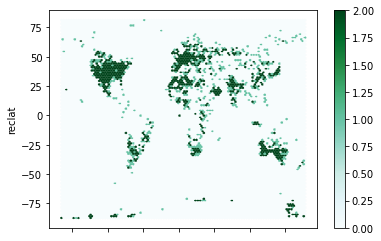

In [7]:
#using pandas
df.plot.hexbin(x="reclong", y="reclat", vmax=2, gridsize=100, linewidth=0.2)

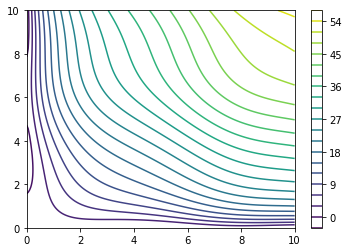

In [8]:
#contor plots
#creating random data
spacing = np.linspace(0, 10, 200)
X, Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.cos(Y) + 2*np.arcsinh(X*Y)**2)

plt.contour(X, Y, Z, levels=20)
plt.colorbar();

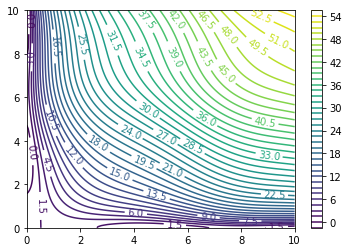

In [9]:
c = plt.contour(X, Y, Z, levels=50)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

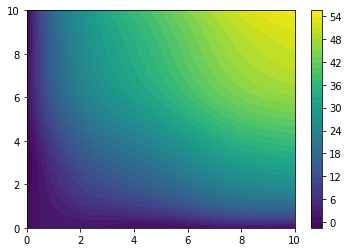

In [10]:
c = plt.contourf(X, Y, Z, levels=40)
plt.colorbar();

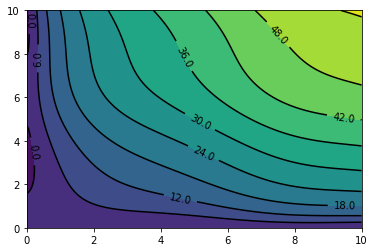

In [11]:
plt.contourf(X, Y, Z, levels=10)
c = plt.contour(X, Y, Z, levels=10, colors="black")
plt.clabel(c, inline=True, fmt="%0.1f");

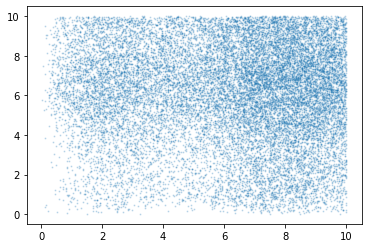

In [12]:
#KDE kernel density estimate plot
# This is called rejection sampling, a way to brute force sample 
# any surface, so long
# as you're fine waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()
passed = np.random.uniform(0, 1, n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);


c:\users\yogesh kumar\appdata\roaming\python\python39\scripts\pandas_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


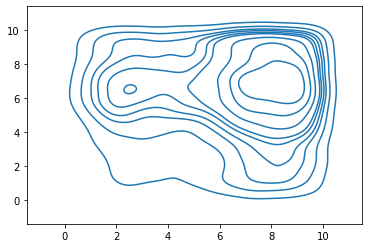

In [13]:
sb.kdeplot(xs, ys);

c:\users\yogesh kumar\appdata\roaming\python\python39\scripts\pandas_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


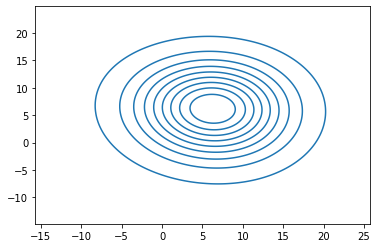

In [14]:
#using bandwidth for smoothness
sb.kdeplot(xs, ys, bw_method=2.0);

c:\users\yogesh kumar\appdata\roaming\python\python39\scripts\pandas_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


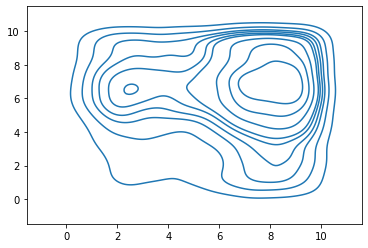

In [15]:
sb.kdeplot(xs, ys, bw_method=0.2);

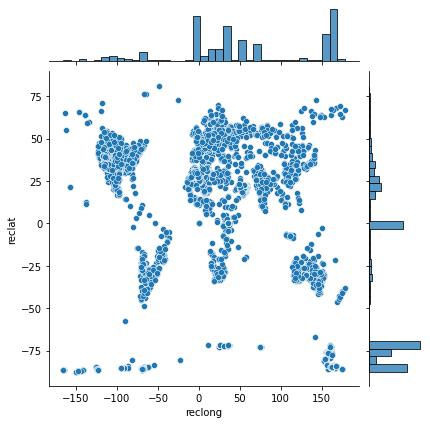

In [16]:
#joint plots interior + marginal plots
sb.jointplot(data=df, x="reclong", y="reclat");

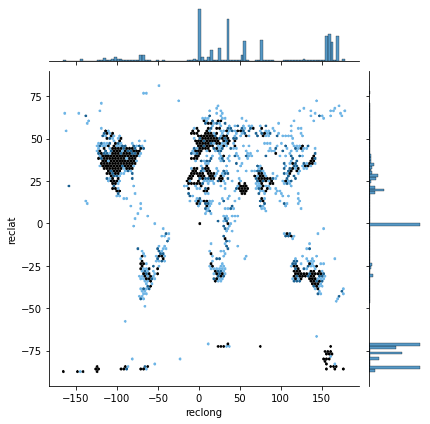

In [17]:
sb.jointplot(data=df, x="reclong", y="reclat", kind="hex",
            gridsize=100, vmax=3, linewidth=0, marginal_kws={"bins":100});

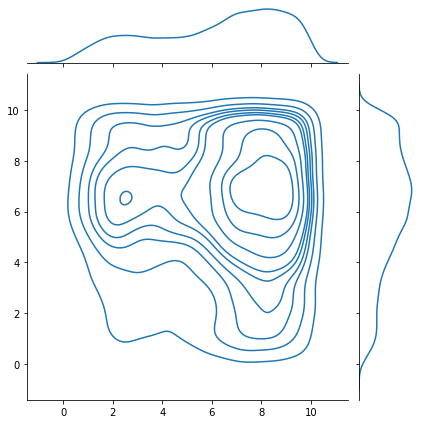

In [18]:
sb.jointplot(x=xs, y=ys, kind="kde");

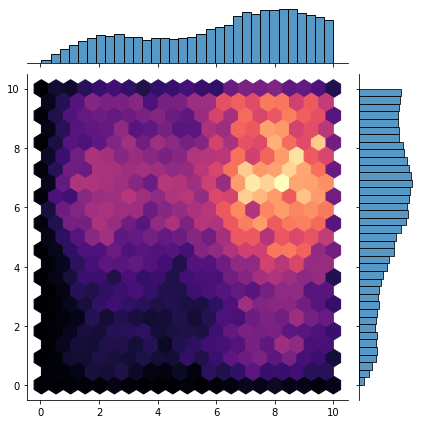

In [19]:
sb.jointplot(x=xs, y=ys, kind="hex", gridsize=20, cmap="magma")

In [ ]:
#pair plot
sb.pairplot(data=df[["reclat", "reclong", "mass"]]);